In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data

In [3]:
x_test_raw = x_test

In [4]:
x_train[x_train < 127] = 0
x_train[x_train >= 127] = 1

x_test[x_test < 127] = 0
x_test[x_test >= 127] = 1

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define Model

In [6]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [9]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5


2023-05-07 15:32:13.017796: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 14s 14ms/step - loss: 0.1774 - accuracy: 0.9457
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0533 - accuracy: 0.9834
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0374 - accuracy: 0.9881
Epoch 4/5
938/938 [==============================] - 13s 13ms/step - loss: 0.0303 - accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 13s 13ms/step - loss: 0.0232 - accuracy: 0.9929


In [10]:
metrics = history.history
loss_list = metrics['loss']
accuracy_list = metrics['accuracy']

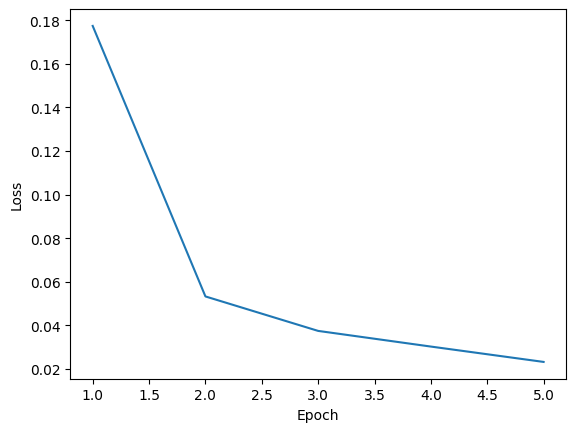

In [11]:
x = np.arange(1, 6, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, loss_list)

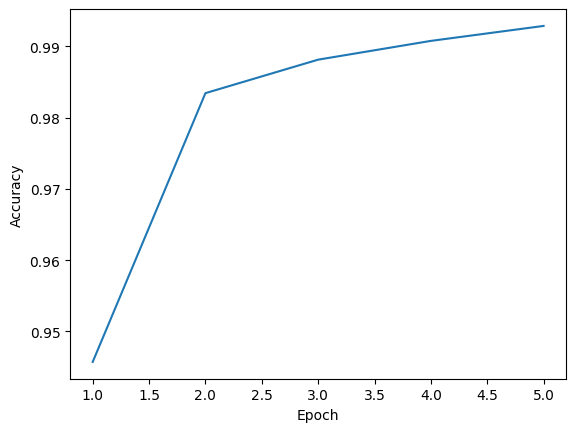

In [12]:
x = np.arange(1, 6, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, accuracy_list)

# Evaluate model

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0282 - accuracy: 0.9919


[0.028153210878372192, 0.9919000267982483]

# Predict

In [14]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


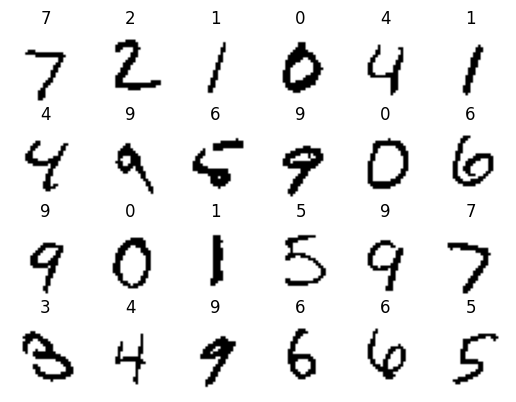

In [16]:
_, axes = plt.subplots(4, 6)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_raw[i], cmap='gray_r')
    ax.set_title(np.argmax(y_pred[i]))
    ax.set_axis_off()